In [68]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
import statsmodels.formula.api as smf
import pandas as pd

%matplotlib inline

In [17]:
def intersect_points((x1, y1, x2, y2), (x3, y3, x4, y4)):
    cx = ((x1*y2-y1*x2)*(x3 - x4) - (x1 - x2)*(x3*y4 - y3*x4))/((x1 - x2)*(y3 - y4) - (y1 - y2)*(x3 - x4))
    cy = ((x1*y2-y1*x2)*(y3 - y4) - (y1 - y2)*(x3*y4 - y3*x4))/((x1 - x2)*(y3 - y4) - (y1 - y2)*(x3 - x4))
    return cx, cy

In [3]:
def generate_lines(radius=1, nlines=3):
    theta = np.random.uniform(0, 2*np.pi, size=2*nlines)
    points = [Point(radius*np.cos(t), radius*np.sin(t)) for t in theta]
    lines = [Line(p1, p2) for p1, p2 in zip(points[::2], points[1::2])]
    return lines, points

In [21]:
def number_of_sections_points(points):
    n_sections = len(points)+1
    for l1, l2 in combinations(points, 2):
        cx, cy = intersect_points(l1, l2)
        does_intersect = np.sqrt(cx**2 + cy**2) < 1
        n_sections += int(does_intersect)
    return n_sections

In [56]:
radius = 1

n_trials = 2000
n_sections = {}
for n_lines in xrange(2, 13):
    _n_sections = np.empty(n_trials)
    for i in xrange(n_trials):
        theta = np.random.uniform(0, 2*np.pi, size=2*n_lines)
        points = [(radius*np.cos(t1), radius*np.sin(t1),
                   radius*np.cos(t2), radius*np.sin(t2))
                  for t1, t2 in zip(theta[::2], theta[1::2])]

        _n_sections[i] = number_of_sections_points(points)
    n_sections[n_lines] = _n_sections

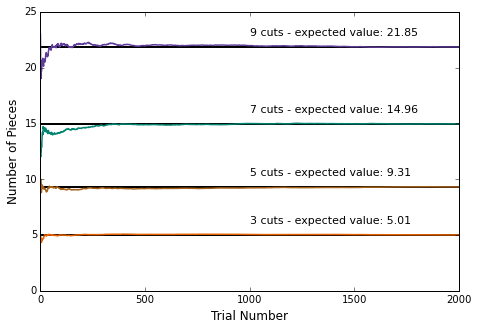

In [87]:
fig, axis = plt.subplots(1, figsize=(7.5, 5))

colors = ['#e66101', '#a6611a', '#018571', '#5e3c99']

for color, n_lines in zip(colors, [3, 5, 7, 9]):
    cum_avg = np.cumsum(n_sections[n_lines])/(np.arange(n_trials)+1.)
    axis.plot(cum_avg, linewidth=1.5, color=color)
    yval = n_sections[n_lines].mean()
    axis.axhline(y=yval, color='black', linewidth=2, zorder=-1)
    axis.text(1000, yval+1, "{:d} cuts - expected value: {:2.2f}".format(n_lines,
                                                                         n_sections[n_lines].mean()),
              fontsize=11)
    
axis.set_ylabel('Number of Pieces', fontsize=12)
axis.set_xlabel('Trial Number', fontsize=12)

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.103e+04
Date:                Sat, 25 Jun 2016   Prob (F-statistic):           5.94e-18
Time:                        09:12:14   Log-Likelihood:                 13.423
No. Observations:                  11   AIC:                            -20.85
Df Residuals:                       8   BIC:                            -19.65
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.0675      0.127      8.389      0.0

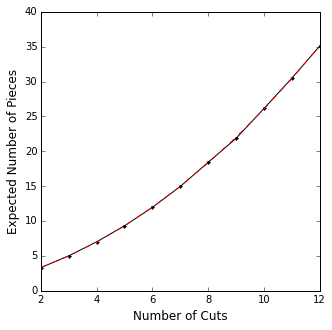

In [84]:
avg_nsections = np.empty(11)
for i, n_lines in enumerate(xrange(2, 13)):
        avg_nsections[i] = n_sections[n_lines].mean()
        
fig, axis = plt.subplots(1, figsize=(5, 5))
axis.plot(np.arange(2, 13), avg_nsections, 'k.-')
axis.set_xlabel('Number of Cuts', fontsize=12)
axis.set_ylabel('Expected Number of Pieces', fontsize=12)
df = pd.DataFrame({'X':np.arange(2, 13), 'Y':avg_nsections})
model = smf.ols(formula='Y ~ pow(X, 2) + X', data=df).fit()
print model.summary()
X = np.arange(2, 13)
fittedY = model.params['Intercept'] + X*model.params['X'] + X**2*model.params['pow(X, 2)']
axis.plot(X, fittedY, 'r--')